<div align='center'> <h1>Hypothesis Testing</h1></div>
<div align='center'> <h3>Problem Statement</h3></div>

Sabrina was assigned the task of collecting random samples from male Healthy Life members who were recently hospitalized in the Greater Toronto Area (GTA) due to heart attacks. She compiled two large separate datasets: one consisting of male Toronto residents who smoked and another consisting of male Toronto residents who never smoked. The aim of this research is to provide evidence that smoking is a risk factor for early occurrence of the first heart attack. After conducting a thorough analysis of the data, Sabrina formulated a hypothesis suggesting that, on average, male smokers who experience their first heart attack are six years younger than male non-smokers who experience their first heart attack. Please calculate sample variances for both samples and decide (depending on the sample variances) what function is most appropriate: 

Data Analysis t-Test: Two-Sample Assuming Equal Variances or Data Analysis t-Test: Two-Sample Assuming Unequal Variances. Please help Sabrina to conduct the test at 5% significance level. As it is known that both samples come from normally distributed populations, no histograms are required.

In [5]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for hypothesis testing
import scipy.stats as st

In [31]:
# Loading dataset

df=pd.read_excel("Sabrina Data.xlsx")
df.head()

,,,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Age of the first heart attack,NaN,NaN,NaN
2,NaN,NaN,Nonsmoking Patients,Smoking Patients,NaN,NaN
3,NaN,1.0,49.1,41.9,NaN,
4,NaN,2.0,88,74,NaN,NaN


In [33]:
# selecting only required columns
df=df.iloc[:,2:4]

# renaming columns
df.rename(columns={'Unnamed: 2':'Nonsmoking Patients','Unnamed: 3':'Smoking Patients'},inplace=True)

# droping unnecessay rows and reseting index
df.drop([0,1,2],inplace=True,axis=0)
df.reset_index(drop=True,inplace=True)
df.head()


,Nonsmoking Patients,Smoking Patients
0,49.1,41.9
1,88,74
2,83.5,75.9
3,54.7,49.2
4,67.1,61.5


In [35]:
df.shape

(73, 2)

In [37]:
# formating the type of column
df['Nonsmoking Patients']=df['Nonsmoking Patients'].astype('float')
df['Smoking Patients']=df['Smoking Patients'].astype('float')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Nonsmoking Patients  65 non-null     float64
 1   Smoking Patients     62 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB


In [41]:
# checking null values
df.isnull().sum()

Nonsmoking Patients     8
Smoking Patients       11
dtype: int64

In [43]:
# droping null values

df[df.isna()].head(12)
df.dropna(inplace=True)

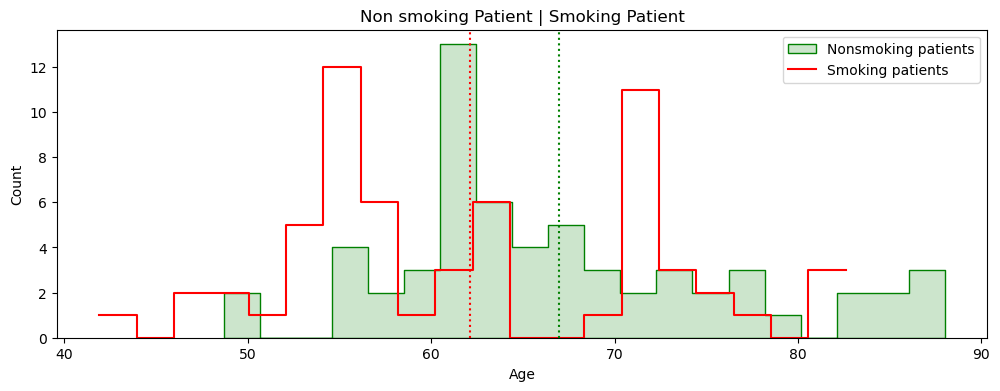

In [89]:
# visually showing the distributio of first heart attack for smoking and non smoking patients 
plt.rcParams['figure.figsize']=12,4
sns.histplot(df['Nonsmoking Patients'],bins=20,color='green',alpha=0.2,label = 'Nonsmoking patients',element='step')
sns.histplot(df['Smoking Patients'],bins=20,color='red',alpha=1,label = 'Smoking patients',element='step',fill=False)

# drawing the average age of getting heart attack
plt.axvline(df['Nonsmoking Patients'].mean(),color='green',linestyle=':')
plt.axvline(df['Smoking Patients'].mean(),color='red',linestyle=':')

plt.xlabel('Age')
plt.title('Non smoking Patient | Smoking Patient')

plt.legend()
plt.show()

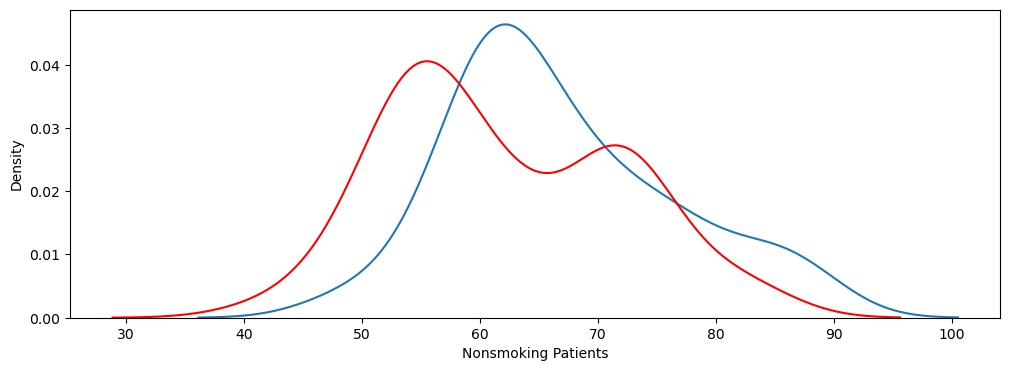

In [71]:
# kernel density plot for non smoker and smoker patients 
sns.kdeplot(df['Nonsmoking Patients'],label='Non-Smoker')
sns.kdeplot(df['Smoking Patients'],color='red',label='Smoker')
plt.legend()
plt.show()

## Hypothesis Testing


**H0 :** There is difference of 6 years in the mean age at which smokers and non-smokers experience their first heart attack.

**H1 :** There is no difference of 6 years in the mean age at which smokers and non-smokers experience their first heart attack.


In [33]:
alpha=0.05
n=len(df)

var_nonSmoker=df['Nonsmoking Patients'].var()
var_smoker=df['Smoking Patients'].var()
print(f"variance of Non smoking patients :{var_nonSmoker}\nvariance of smoking patients :{var_smoker}")
print(var_smoker/var_nonSmoker)
print("As the ratio is almost 1 so for this Equal variance is considered ")

# performing t-test 

t_test,p_value=st.ttest_ind(df['Smoking Patients'],df['Nonsmoking Patients'])
print(f'\nt-test value:{t_test}\np_value : {p_value} ')

print("\n***CONCLUSION***\n")
if p_value<0.05:
    print('WE REJECT THE NULL HYPOTHESIS')
else:
    print('WE FAILED TO REJECT THE NULL HYPOTESIS')

variance of Non smoking patients :89.95871186440678
variance of smoking patients :96.95287005649716
1.0777485364911912
As the ratio is almost 1 so for this Equal variance is considered 

t-test value:-2.751666620997853
p_value : 0.006865623462074645 

***CONCLUSION***

WE REJECT THE NULL HYPOTHESIS


**CONCLUSIN :** 

**Test rejects the null hypothesis, it means there is significant evidence that the difference in the mean ages at which smokers and non-smokers experience their first heart attack is not exactly 6 years.** 

**In this case, age difference could be either greater or less than 6 years.**